In [1]:
import time
import os
import datetime
import matplotlib.pyplot as plt

from models.segnet import DenseSegNet
from loader.cityscapes import CityscapesLoader

import torch

In [2]:
#constants
load_model_file = "net_epoch_31_steps_11200_loss_<IDK what to add here>_Mar_09_20:30:24.t7"
model_name = "Default_SegNet"

In [3]:
data_loader = CityscapesLoader

t_loader = data_loader(
    "/datasets/cityscapes",
    is_transform=True,
    split="val",
    img_size=(256, 512),
    augmentations=None,
)

Found 500 val images


In [4]:
# n_classes = t_loader.n_classes
n_classes = 20

In [5]:
model = DenseSegNet(num_classes=n_classes)
folder = 'saved_models/' + model_name + "/"
model.load_state_dict(torch.load(folder + load_model_file))

In [14]:
img, labels = t_loader[100]

In [15]:
model.eval()
outputs = model(img.view([1, 3, 256, 512]))

In [16]:
pred = outputs.data.max(1)[1].cpu().numpy()

In [17]:
imgt = img.numpy().transpose([1, 2, 0])

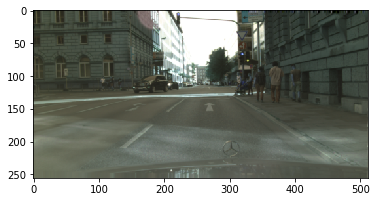

In [18]:
plt.imshow(imgt)
plt.show()

In [19]:
gt_img = t_loader.decode_segmap(labels.numpy())

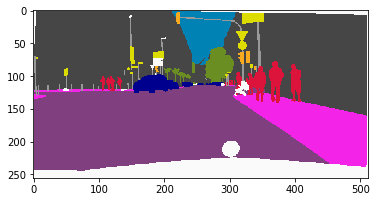

In [20]:
plt.imshow(gt_img)
plt.show()

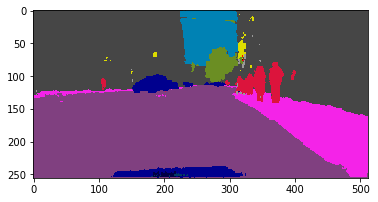

In [21]:
gt_img = t_loader.decode_segmap(pred.reshape([256, 512]))
plt.imshow(gt_img)
plt.show()